In [1]:
#List of Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#Using Standard Scaler
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA # SVD , t-SNE , Linear Discrimant Analysis
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report 
warnings.filterwarnings('ignore')

#Printing the versions
print(f"Pandas Version : Pandas {pd.__version__}")
print(f"Numpy Version : Numpy {np.__version__}")
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn Version : Seaborn {sns.__version__}")


#Magic functions for In-notebook Display
%matplotlib inline

Pandas Version : Pandas 0.25.1
Numpy Version : Numpy 1.16.5
Matplotlib Version : Matplotlib 3.1.1
Seaborn Version : Seaborn 0.9.0


In [2]:
df=pd.read_csv('creditcard.csv') #Importing the dataset

In [3]:
df #Viewingthe overall dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.head(100) #Viewing top 100 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0


In [5]:
df.tail(100) #Viewing bottom 100 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284707,172700.0,-0.682255,1.071898,-0.023906,-0.738242,0.600906,-0.729368,0.626959,0.336486,-0.342863,...,-0.190374,-0.594392,0.078914,0.658295,-0.552961,0.107366,0.226084,0.156534,1.50,0
284708,172701.0,2.018105,0.073226,-1.615154,0.351058,0.333905,-0.676284,0.050474,-0.071028,0.302728,...,-0.306646,-0.841768,0.356773,0.655112,-0.331463,0.144352,-0.069820,-0.039845,1.98,0
284709,172703.0,0.081339,1.014673,-0.106095,-0.421918,0.720847,-0.914371,1.107958,-0.268971,-0.212855,...,0.407356,1.457682,-0.048590,1.153250,-0.797593,-0.276889,0.514156,0.334811,7.99,0
284710,172703.0,2.141611,-0.969139,-0.652944,-0.902773,-0.821081,-0.264356,-0.970697,-0.087421,-0.008249,...,0.335043,1.032939,0.136960,0.665397,-0.104844,-0.115775,0.011380,-0.037789,29.00,0
284711,172704.0,-1.034517,0.015312,-0.870533,-4.267054,2.062860,3.145858,-0.215357,1.462706,1.167351,...,-0.095626,-0.484040,0.221399,0.662252,-0.425485,-0.780724,0.285122,0.147288,58.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
pd.set_option('display.max_rows',500)
df.head(500) ##Viewing the top 500 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Observations

1. There are 30 Feature variables
2. Time is in seconds and it states the timestamp between transactions
3. The Vs are probably scaled or undergone PCA transformation to prevent info leaks
4. Amount is transaction amount which is unscaled
5. There are 284807 rows and zero NA values
6. Class variable determines if the transaction is Legit or Fraud (0-Legit, 1-Fraud). Huge class imbalance noted
7.V1-V28 is normalised, which suggests mean is 0 and variance is 1

In [7]:
 df.Class.unique() # calling the unique values of the class column

array([0, 1], dtype=int64)

In [8]:
df.Time.dtype #the functionality of the time column needs to be fixed as it is float

dtype('float64')

In [9]:
172792/(60*60) # t he time column shows the observatioms are taken in a time span of 48 hours or 2 days 

47.99777777777778

## More exploration on the dataset 

In [10]:
df.shape #Data set is not small

(284807, 31)

In [11]:
#Better design
print(f"Rows : {df.shape[0]}")
print (f"Columns : {df.shape[1]}")

Rows : 284807
Columns : 31


## Exploration Function 1

### .info () Function

In [12]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Observations from the .info() method!

1. There are zero null values in the input data. All the Vs have 284807 entries which is exactly same as the RangeIndex
2. All the Vs are float64
3. The memory usage is 67.4 MB, which is moderately cumbersome on RAM
4. Column names are not lower_case, which needs to be fixed

## Exploration Function 2

### .describe() function

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
df[['Amount' , 'Class' , 'Time']].describe()

,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


### Observations from df.describe()

1. Previous observation of V1-V28 is normalised does not hold true anymore, as we can clearly see that mean is not zero
2. Count suggests the non null values for all variables
3. In amount there is massive outlier as the mean is 88.35 while max is 25691.16

In [15]:
df['categorical'] = 'a'

In [16]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,categorical
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,a
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,a


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
Time           284807 non-null float64
V1             284807 non-null float64
V2             284807 non-null float64
V3             284807 non-null float64
V4             284807 non-null float64
V5             284807 non-null float64
V6             284807 non-null float64
V7             284807 non-null float64
V8             284807 non-null float64
V9             284807 non-null float64
V10            284807 non-null float64
V11            284807 non-null float64
V12            284807 non-null float64
V13            284807 non-null float64
V14            284807 non-null float64
V15            284807 non-null float64
V16            284807 non-null float64
V17            284807 non-null float64
V18            284807 non-null float64
V19            284807 non-null float64
V20            284807 non-null float64
V21            284807 non-null float64
V22            284807 non-null 

In [18]:
df.describe(include = 'all') # include = 'int64' , 'float64'

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,categorical
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284807
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,NaN
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,NaN
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,NaN
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,NaN
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,NaN
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,NaN


In [19]:
df['categorical'].describe(include = 'all') # include = 'int64' , 'float64'

count     284807
unique         1
top            a
freq      284807
Name: categorical, dtype: object

## Observations

1. Time column is not in standard measures , probably in seconds , but max of time is not equal to the length of the dataframe, so there sure are some transactions at the same time
2. Amount Min is 0 , must observe that for some errors or outliers
3. Unscaled amount with high possible skewness , based on min , max and mean
4. Class Imbalance Issue surely Exists 

In [ ]:
# Since the time column is not in any standard sense , Datetime format or Timestamp format
# And as it starts from 0 , the dataset must have a starting and ending point, let's find what time span is !

In [20]:
# Important to know the time span of the data -
print(df['Time'].min() / (60*60))
print(df['Time'].max() / (60*60)) # ~ 48 hours , so 2 days ! , better picture 

0.0
47.99777777777778


In [21]:
df['Time'].max()

172792.0

# Observing some common Data Quality Metrics

In [22]:
print(df.isnull().any().sum()) # 3 ways
print('\n')
print(df.isnull().sum())
print('\n')
print(df.isnull().values.any()) # df['col_name']

0


Time           0
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount         0
Class          0
categorical    0
dtype: int64


False


#### Duplicate Values

In [23]:
print(len(df.drop_duplicates())) # Length of dataframe > Length after drop_duplicates()
print(len(df[df.duplicated()]))  # 1081 duplicate values , remove them !
# Quality Wise : Duplicates / Total Length = 1081/284807 = 0.00379  = 0.38 %

283726
1081


In [24]:
len (df)

284807

In [25]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [26]:
# Removing the Duplicate Values
df.drop_duplicates(inplace = True)
print(len(df))  # some data reduced

283726


In [27]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,categorical
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,a
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,a
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,a
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,a
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,a


In [28]:
df.reset_index(inplace = True, drop = True)

In [29]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,categorical
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,a
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,a
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,a
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,a
283725,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,a


In [30]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'categorical'],
      dtype='object')

In [31]:
#Transforming the columns to lower case
df.columns = df.columns.str.lower()

In [32]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class', 'categorical'],
      dtype='object')

## Amount Column

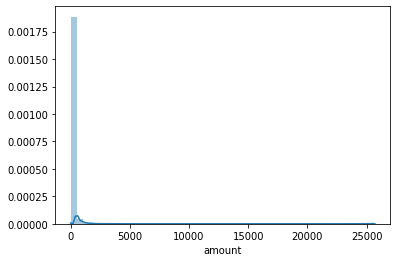

In [33]:
plt.figsize = (20,20)
sns.distplot(df['amount'])
plt.show()

## Observation for the Amount Column

1. The dataset is highly skewed in terms of the amount

In [34]:
df['hour'] = df['time']/(60*60) # Using 24 hours

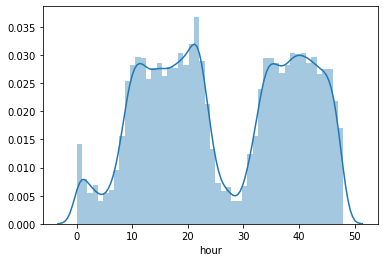

In [35]:
# Time plots 
plt.figsize = (20,20)
sns.distplot(df['hour'])
plt.show()

## Observations

1. From the distribution plot it can discerened that at the initial hours there is a significant rise in frequency of transactions. 
2. Then at a later time within the 1st half of 24 hours there a drop in number of transactions. There is a similar pattern in the 2nd half of the 24 hours data. Here initially there is a significant rise in frequency of transactions, then it again reduces at a later time.
3. At present the distribution plot includes both genuine and fraud transactions. However, we want to depict whether there is any pattern in distribution plot of genuine and fraud transactions.
4.Highly skewed dataset , lots of small value / amount transactions
5. Possibility of lot's of 0 value transactions well they need to be analysed sepeartely for any correlation with class column

In [36]:
df['amount'].quantile(0.75) # 75% data values below 77.51 Euros ! , can also be observed from .describe()

77.51

# __Class__ Column

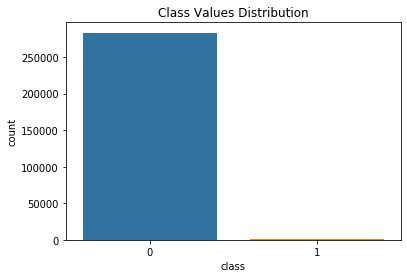

In [37]:
plt.figsize = (20,20)
sns.countplot(df['class']) # Highly Skewed , Imbalanced Data
plt.title('Class Values Distribution')
plt.show()

([<matplotlib.patches.Wedge at 0x15add29ecc8>,
 [Text(-1.1999835424914616, 0.006284723513625731, 'Genuine '),
  Text(1.1999835428684147, -0.006284651539043478, 'Fraud ')],
 [Text(-2.499965713523878, 0.013093173986720275, '99.833%'),
  Text(2.4999657143091976, -0.013093024039673912, '0.167%')])

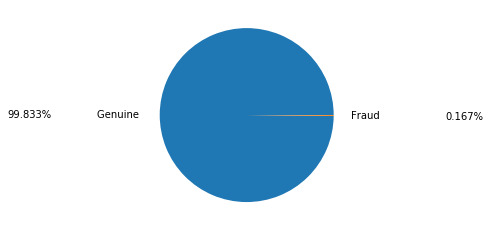

In [38]:
labels = ['Genuine ','Fraud ']
plt.pie(df['class'].value_counts(), labels=labels, autopct='%0.3f%%' , pctdistance=2.5, labeldistance=1.2)

In [39]:
df['class'].value_counts()
# Class 0 is Legitimate , Genuine Transactions
# Class 1 represents Fraudulent Transactions

0    283253
1       473
Name: class, dtype: int64

In [40]:
df['class'].value_counts()

0    283253
1       473
Name: class, dtype: int64

In [42]:
df['variable'] = 'Abc'

In [43]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v24,v25,v26,v27,v28,amount,class,categorical,hour,variable
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,a,0.000000,Abc
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,a,0.000000,Abc
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,a,0.000278,Abc
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,a,0.000278,Abc
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,a,0.000556,Abc


In [44]:
df['variable'].value_counts().index[0]

'Abc'

In [45]:
# "Abc : 283726"
print('{}:{}'.format(df['variable'].value_counts().index[0] , df['variable'].value_counts()[0]))

Abc:283726


In [46]:
df['variable'].value_counts()

Abc    283726
Name: variable, dtype: int64

In [47]:
pd.Series(df['amount'].value_counts())[0:]

0.00       1808
11.50      1739
4.49       1579
5.00       1564
0.77       1443
           ... 
362.97        1
241.71        1
462.78        1
337.41        1
1080.06       1
Name: amount, Length: 32755, dtype: int64

In [48]:
per_of_class_1 = df['class'].value_counts()[1] / len(df)
print("Skew Percentage , Less Dominant Class : {}".format(per_of_class_1))

Skew Percentage , Less Dominant Class : 0.001667101358352777


# __Time__ Column

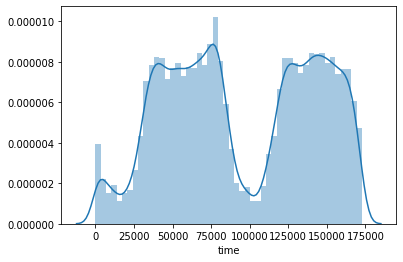

In [49]:
plt.figsize = (20,20)
sns.distplot(df['time']) # No particular pattern as such , well distributed data
plt.show()

## Visualising Data for detecting any particular Pattern or Anomaly using Histogram Plots

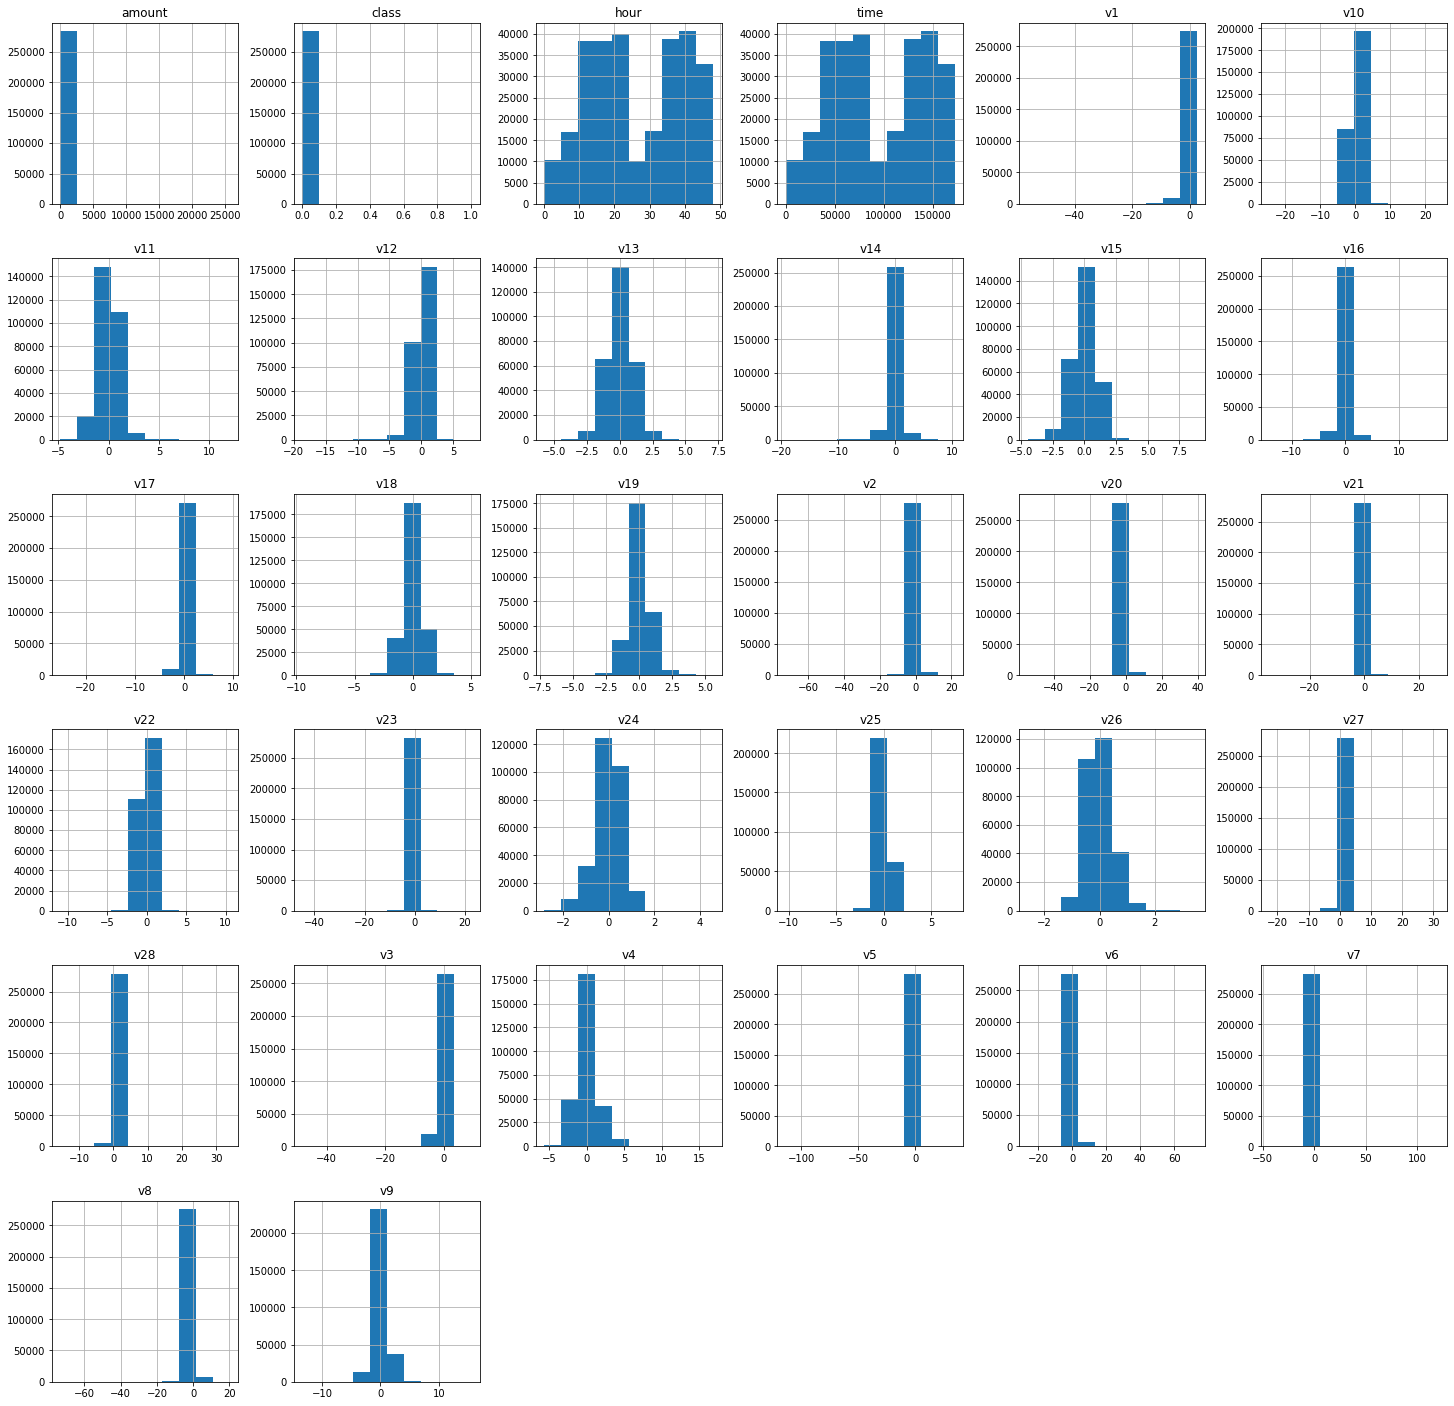

In [50]:
df.hist(figsize = (25,25))
plt.show()

In [51]:
df.corr()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,hour
time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359,1.000000
v1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486,0.117927
v2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624,-0.010556
v3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322,-0.422054
v4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326,-0.105845
v5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812,0.173223
v6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915,-0.063279
v7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347,0.085335
v8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068,-0.038203
v9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021,-0.007861


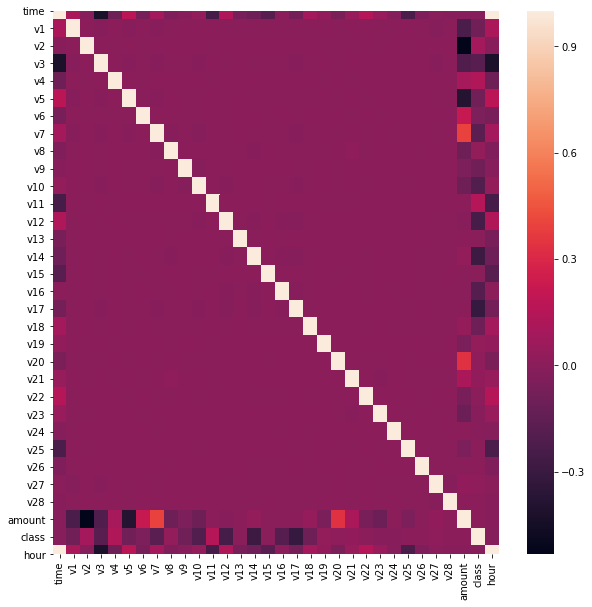

In [53]:
# Plotting a Correlation Plot to observe any correlations or patterns between the columns if the dataset.

corr_matrix = df.corr()
plot = plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix) # seaborn Library
plt.show()

# Observations

1. Column v7 is highly correlated to amount
2. Column v20 is also correlated to amount
3. Amount is highly negatively correlated to v2
4. v3 and time are correlated

In [54]:
df.drop(columns = ['variable' , 'categorical'] , inplace = True)

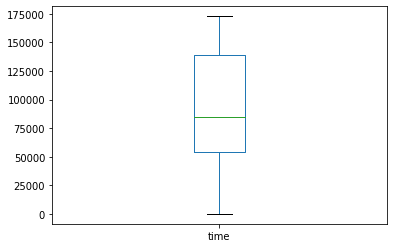

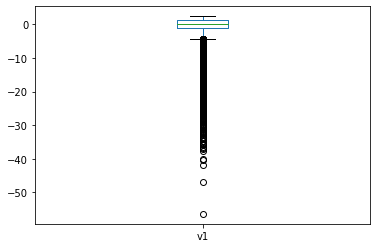

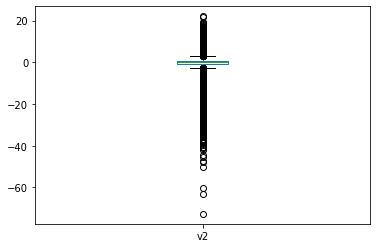

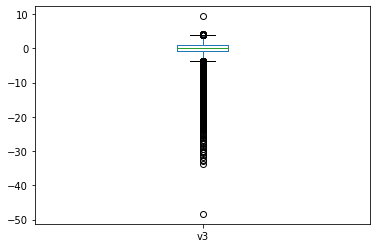

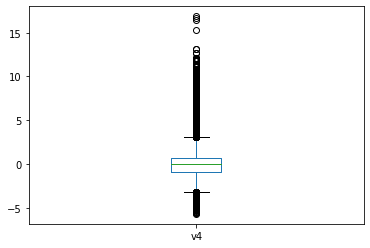

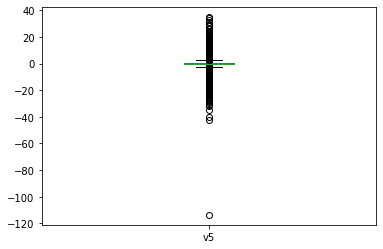

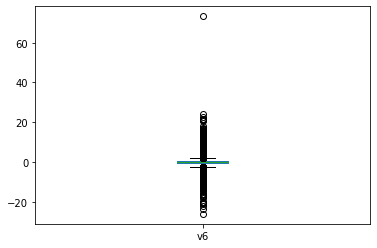

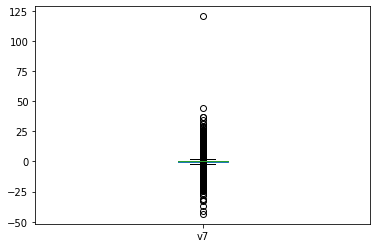

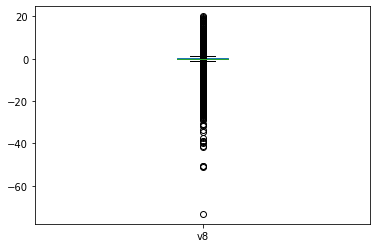

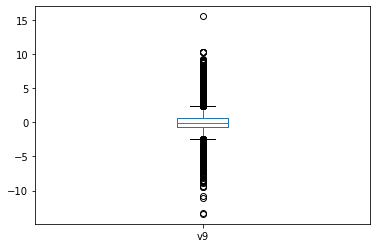

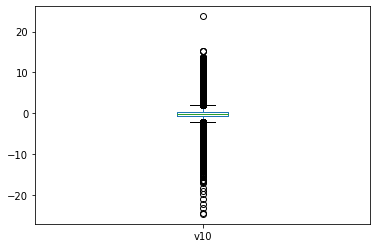

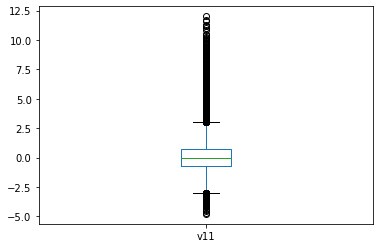

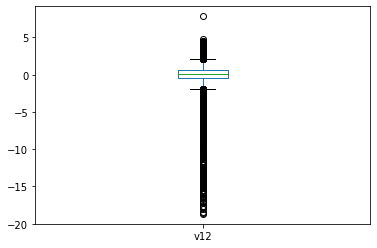

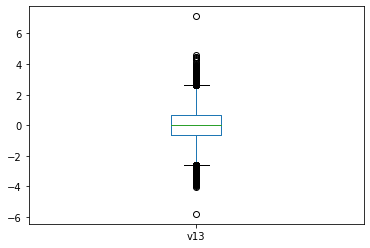

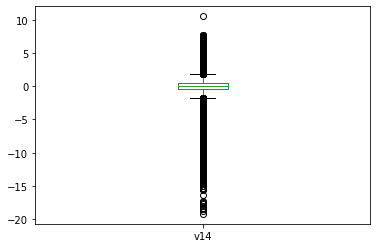

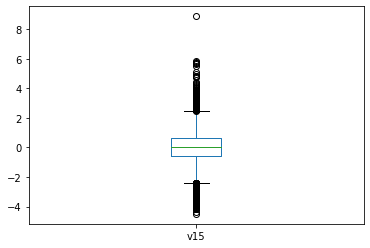

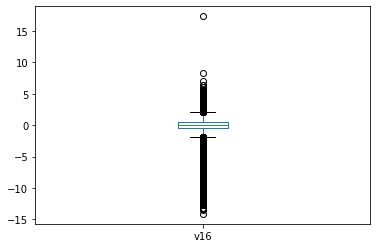

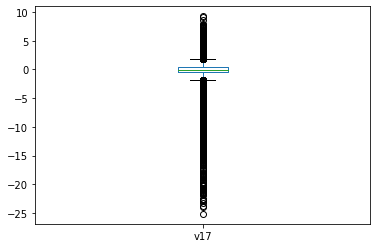

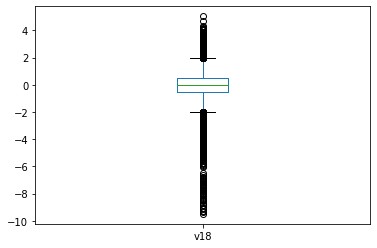

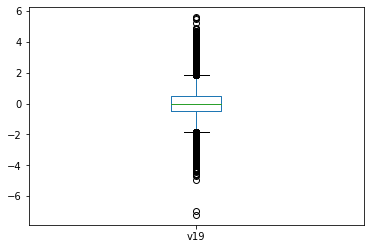

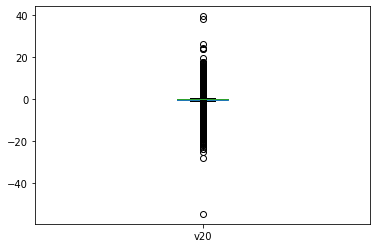

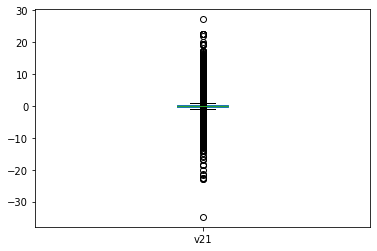

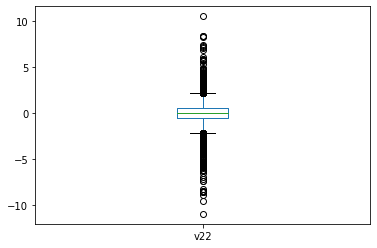

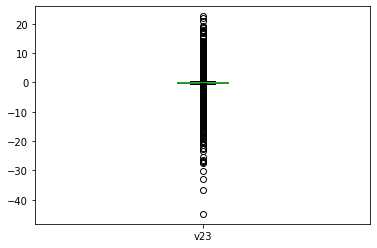

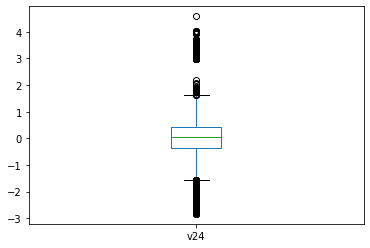

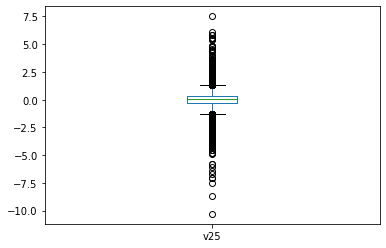

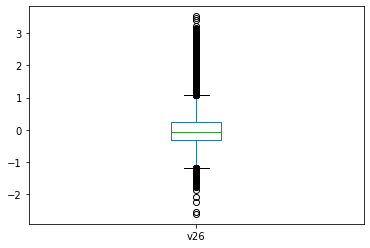

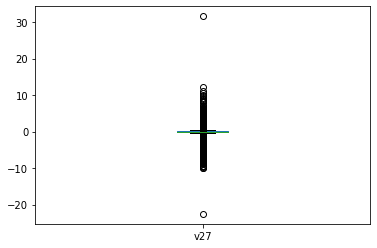

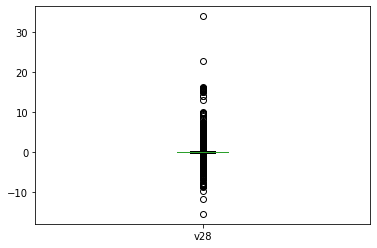

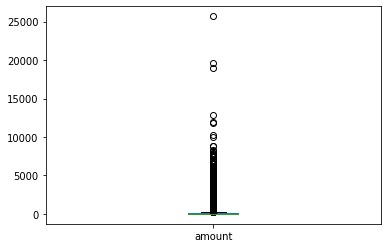

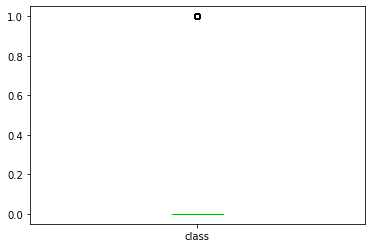

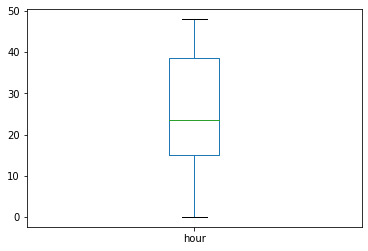

In [55]:
# Box plot for observing if columns have some outliers , or a particular column is messy
for col in df.columns:
    plt.figure()
    df[col].plot(kind = 'box')

In [56]:
# since we have now observed the data roughly and we know what things need to be fixed , let's fix them
# We also process some columns to make them usable for further analysis and finally save the processed dataset for modelling

## Preprocessing

In [57]:
# Handle the time columns - Convert from seconds to Hours
# Bin the Amount columns : pd.cut()
# Solving the Imbalance - imblearn python library ( Undersampling , Over Sampling and SMOTE -)

In [58]:
### Processing the Time Column

df['hour'] = df['time']/(60*60)%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

# Scale the Amount Column 

In [59]:
ss = StandardScaler() # object of the class StandardScaler ()

In [60]:
# fit - > amount column
# transform - > StandardScaler

# predict - > test data ( prediction )

In [ ]:
# df['col name']

# df.col_name

In [61]:
df['amount'].values.reshape(-1 , 1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [62]:
ss.fit_transform(df['amount'].values.reshape(-1,1))

array([[ 0.24419951],
       [-0.34258399],
       [ 1.15889967],
       ...,
       [-0.0822395 ],
       [-0.31339058],
       [ 0.51329005]])

In [63]:
df['amount_scaled'] = ss.fit_transform(df['amount'].values.reshape(-1,1))

In [64]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.073813


# Visualising Again 

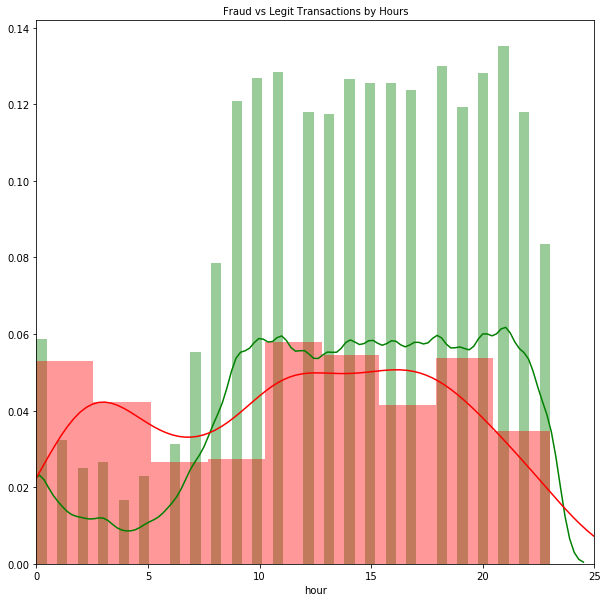

In [65]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Legit Transactions

# matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # tuple of the figure size
# seaborn as sns

sns.distplot(df[df['class'] == 0]["hour"], color='g') # Genuine - green

sns.distplot(df[df['class'] == 1]["hour"], color='r') # Frauduletn - Red

plt.title('Fraud vs Legit Transactions by Hours', fontsize=10)
plt.xlim([0,25])
plt.show()

In [ ]:
# with a very small confidence we may say that Fraud transactions are more frequent towards the night , assumption
# But thats not significant enough

In [66]:
# Observing patterns in No of Legit Transactions vs Time (Hour) to observe more

legit_hour_count = df[df['class']==0].groupby(['hour'] , as_index = False)['hour'].size().reset_index(name = 'Count')

In [67]:
legit_hour_count

,hour,Count
0,0,7641
1,1,4198
2,2,3260
3,3,3470
4,4,2181
5,5,2977
6,6,4073
7,7,7210
8,8,10223
9,9,15751


## Observations

1. The red curve is higher than the green curve around 7.5 to 8 hours which suggets that the fraud transactions are highest around 7.5 to 8 hours 
2. However, after these hours the green curve or the legit transactions frequency are significantly high
3. We are assuming 7.5 to 8 hours as the night time when the frequency of fraud transactions are at its peak

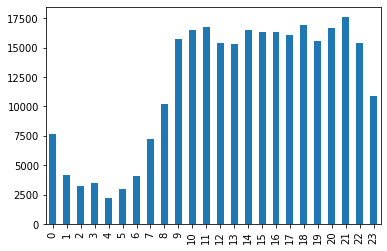

In [68]:
legit_hour_count['Count'].plot(kind = 'bar')

In [69]:
fraud_hour_count = df[df['class']==1].groupby(['hour'] , as_index = False)['hour'].size().reset_index(name = 'Count')

In [70]:
fraud_hour_count.head()

,hour,Count
0,0,6
1,1,10
2,2,48
3,3,17
4,4,23


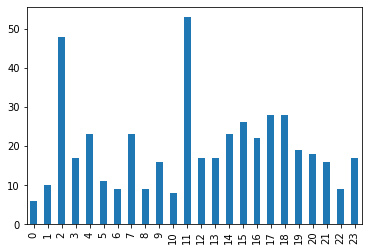

In [71]:
fraud_hour_count['Count'].plot(kind = 'bar')

In [ ]:
# The fraudulent transactions are enormously high during 2nd and 11th hours

# Comparing Amount and Transaction Class

In [72]:
# We need to bin amounts first , but the problem is the skewness of the amount , still , let's try

df[df['class']==0]['amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
283721      0.77
283722     24.79
283723     67.88
283724     10.00
283725    217.00
Name: amount, Length: 283253, dtype: float64

In [73]:
legit_list = df[df['class']==0]['amount'].describe().tolist()
fraud_list = df[df['class']==1]['amount'].describe().tolist()

In [74]:
legit_list

[283253.0,
 88.41357475466688,
 250.37902291276455,
 0.0,
 5.67,
 22.0,
 77.46,
 25691.16]

In [75]:
df[df['class']==0]['amount'].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: amount, dtype: float64

In [76]:
fraud_list

[473.0,
 123.87186046511626,
 260.21104064437077,
 0.0,
 1.0,
 9.82,
 105.89,
 2125.87]

In [77]:
pd.DataFrame(np.transpose(legit_list) , np.transpose(fraud_list))

,0
473.000000,283253.000000
123.871860,88.413575
260.211041,250.379023
0.000000,0.000000
1.000000,5.670000
9.820000,22.000000
105.890000,77.460000
2125.870000,25691.160000


In [78]:
comp_df = pd.DataFrame([df[df['class']==0]['amount'].describe().to_dict() , df[df['class']==1]['amount'].describe().to_dict()])

In [79]:
comp_df

,count,mean,std,min,25%,50%,75%,max
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


In [80]:
comp_df = comp_df.T

In [81]:
comp_df.columns = ['Legit' , 'Fraud']

In [82]:
comp_df

,Legit,Fraud
count,283253.000000,473.000000
mean,88.413575,123.871860
std,250.379023,260.211041
min,0.000000,0.000000
25%,5.670000,1.000000
50%,22.000000,9.820000
75%,77.460000,105.890000
max,25691.160000,2125.870000


In [83]:
comp_df = comp_df.iloc[1:]

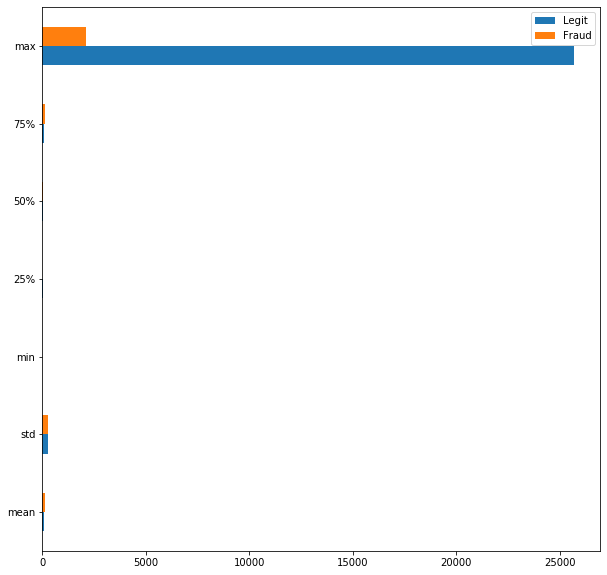

In [84]:
comp_df.plot(kind = 'barh' , figsize = (10,10))

In [85]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.073813


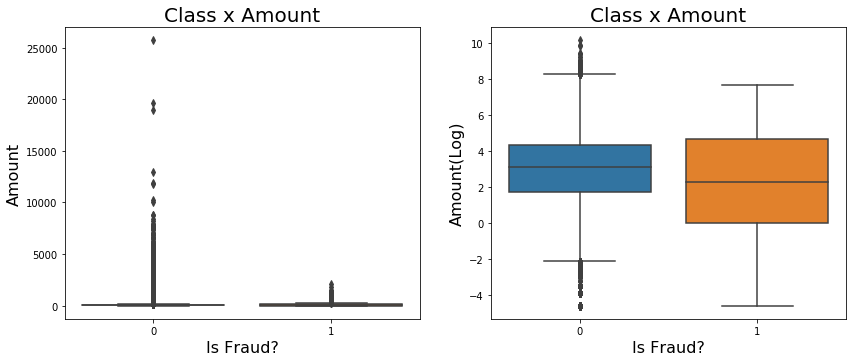

In [86]:
#Using feature engineering for a better visualization of the values
df['amount_log'] = np.log(df.amount + 0.01)

plt.figure(figsize=(14,6))
# Let's explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="class",y="amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)
 
plt.subplot(122)
ax1 = sns.boxplot(x ="class",y="amount_log", data=df)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

# Observations

We can see a slightly difference in log amount of our two Classes. <br>
The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have highest values

In [87]:
df.to_csv('elementary_data_processed.csv' , index = False)

In [88]:
df = pd.read_csv('elementary_data_processed.csv')

In [89]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.244200,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.342584,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.158900,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.139886,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.073813,4.248495


In [90]:
df.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled,amount_log
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23,-0.350252,-0.248461
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23,-0.254325,3.210844
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23,-0.082239,4.217889
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23,-0.313391,2.303585
283725,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,23,0.513290,5.379943


In [ ]:
#df.drop(columns=['variable'], inplace =True)

# Machine Learning Step 1

In [91]:
y = df['class'].values

X = df.drop(columns = ['time' , 'amount' , 'hour' , 'class','amount_log']) # Try out with different combinations

In [92]:
pd.Series(y).value_counts()

0    283253
1       473
dtype: int64

In [93]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Sequence for splitting


logreg = LogisticRegression() # () towards the end
logreg.fit(X_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Sequence for splitting


logreg = LogisticRegression() # () towards the end
logreg.fit(X_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred = logreg.predict(X_test)
print(accuracy_score(y_pred , y_test))

0.9991541154632393


In [98]:
pd.Series(y_pred).value_counts()

0    85035
1       83
dtype: int64

In [99]:
pd.Series(y_test).value_counts()

0    84989
1      129
dtype: int64

In [100]:
81/129 #Actual accuracy

0.627906976744186

# Class Imbalance ! 

In [101]:

cnf_matrix = confusion_matrix(y_test , y_pred)

cnf_matrix

array([[84976,    13],
       [   59,    70]], dtype=int64)

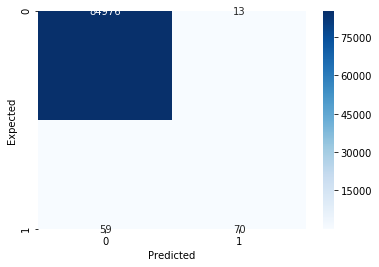

In [102]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [103]:
pd.Series(y_test).value_counts()

0    84989
1      129
dtype: int64

In [104]:
pd.Series(y_pred).value_counts()

0    85035
1       83
dtype: int64

In [105]:
len(y_test)

85118

In [106]:
(81-13)/129 # Real Accuracy 

0.5271317829457365

In [107]:
roc_auc_score(y_test , y_pred) 

# Accuracy - 99%
# Accuracy Stage 1 - 62%
# Accuracy Stage 2 - 52%

0.7712413489716545

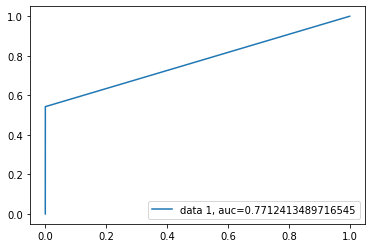

In [108]:
# Here is the Problem ! 

y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [109]:
# the imblearn library
!pip install imblearn

In [110]:
!pip install sklearn

In [111]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.244200,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.342584,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.158900,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.139886,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.073813,4.248495


In [112]:


#X, y = make_classification(n_classes=2) #, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 473, 1: 473})


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred = logreg.predict(X_test)
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now


0.9401408450704225


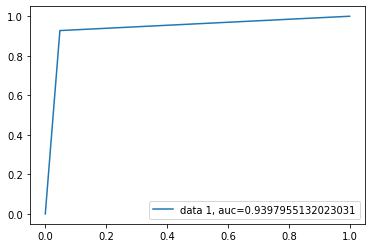

In [115]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Oversampling the Data

In [116]:
print('Original dataset shape %s' % Counter(y))
random_state = 42
rus = RandomOverSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 283253, 1: 283253})


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
y_pred = logreg.predict(X_test)
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now


0.9483501223874976


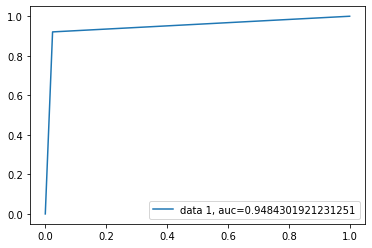

In [119]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SMOTE Sampling

In [120]:
print('Original dataset shape %s' % Counter(y))

rus = SMOTE(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 283253, 1: 283253})


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now

0.9443078045565807


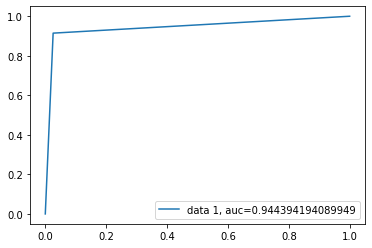

In [123]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [124]:
# Let's Visulaise the SMOTE
len(y)
#plt.scatter(x = X , y = y)

283726

In [125]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_res)

In [ ]:
# reduce 29 columns - 2 columns , so that I can look at them in a plot !

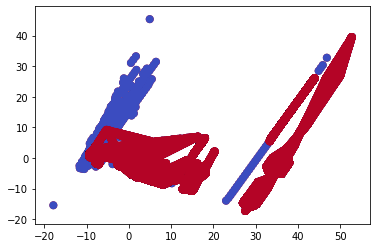

In [126]:
#f,ax = plt.figure(figsize=(24,6))

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res== 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.show()

# Undersampled Data

In [127]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))

Resampled dataset shape Counter({0: 473, 1: 473})


# Oversampled Data

In [128]:
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 283253, 1: 283253})


# SMOTE Data

In [129]:
rus = SMOTE(random_state=42)
X_smote, y_smote = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 283253, 1: 283253})


# Now applying different models and evaluating the dataset

# Classifier 2 - Decision Tree Classifier

0.9992011090486148


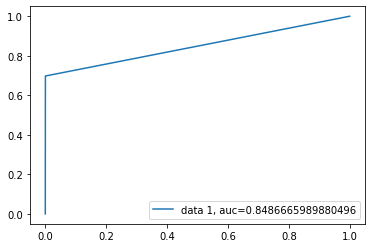

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

y_pred = dte.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

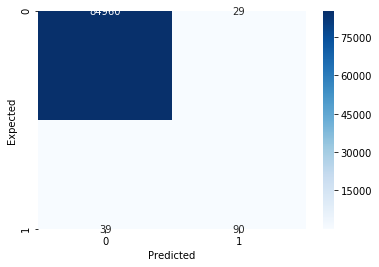

In [137]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.8661971830985915


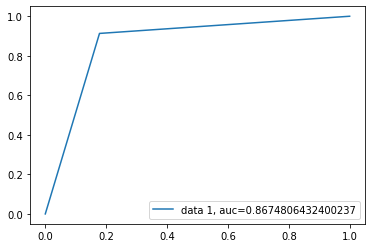

In [138]:
# Undersampled data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

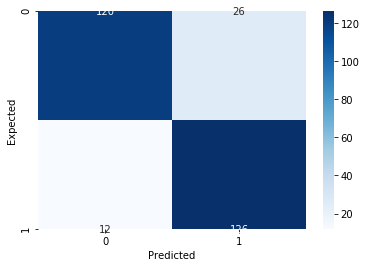

In [139]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9998940877424214


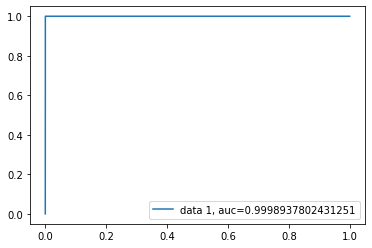

In [143]:
# Oversampled data with Decision Tree Classifiers # Best model after Classifier- DTE

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

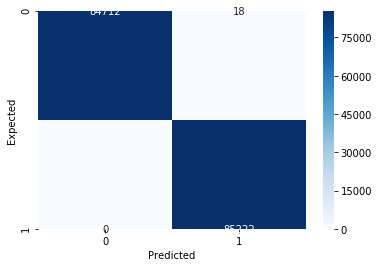

In [144]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9981818395782338


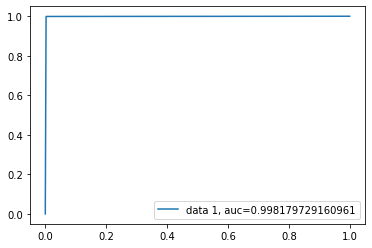

In [145]:
# SMOTE data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

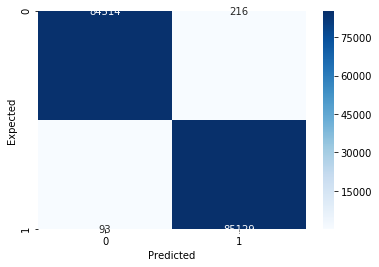

In [146]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Classifier - 3 Random Forest Classifier

0.9995653093352758


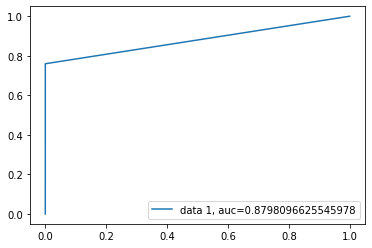

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

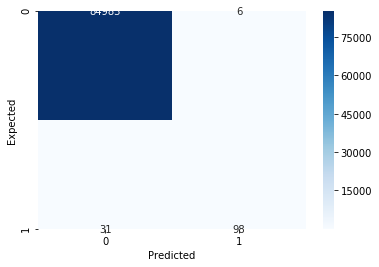

In [148]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [149]:
#Undersampled

0.9401408450704225


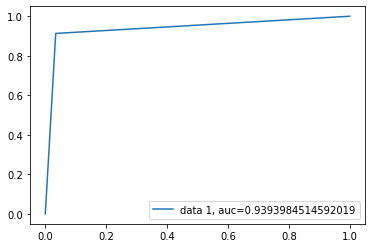

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Classifier - 4 Naive Bayes Classifier

0.9119718309859155


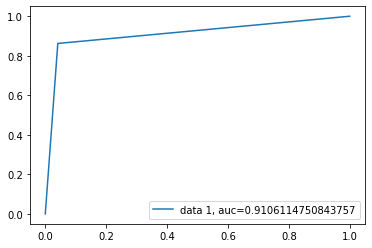

In [153]:
# Fitting Naive Bayes to the Training set
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
rfc = GaussianNB()
rfc.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred , y_test))



y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       159
           1       0.86      0.95      0.90       125

    accuracy                           0.91       284
   macro avg       0.91      0.92      0.91       284
weighted avg       0.92      0.91      0.91       284



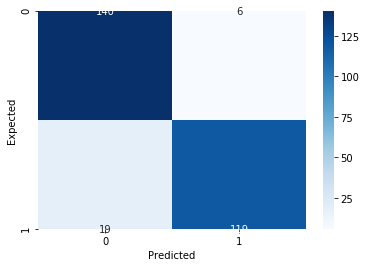

In [156]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_pred, 
            y_test))


cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Conclusion

It can be discerned that among all the classifiers Oversampled data with Decision Tree Classifiers is the best classifier. This is the only classifier which is giving an accuracy score of 0.9998 and also an AUC score of 0.9989. Moreover, on plotting the confusion matrix we can see there are only 18 false negatives and 0 false positives which proves this is the best classifier among all others.
